<h2 align=center>Analyze Worldwide Box Office Data with Seaborn and Python</h2>


### Libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

### Task 1: Data Loading and Exploration

In [2]:
train = pd.read_csv('C:\\Users\\surab\\Downloads\\train.csv')
test = pd.read_csv('C:\\Users\\surab\\Downloads\\test.csv')

In [3]:
train.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,...,12,4,2,13,8,4,2,4,4,0
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,...,0,0,1,0,1,1,1,0,0,0
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,10/10/14,...,5,9,1,5,4,3,6,3,1,0
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,3/9/12,...,0,0,1,0,0,1,0,0,0,0
4,5,0,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,2/5/09,...,0,0,1,0,0,1,0,0,0,0


### Task 2: Visualizing the Target Distribution

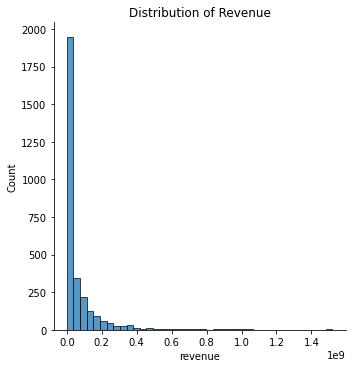

In [47]:

sns.displot(train['revenue'],bins=40,kde=False);
plt.title('Distribution of Revenue');

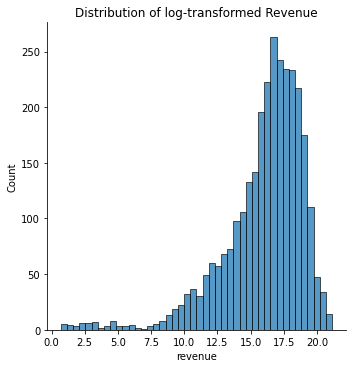

In [21]:

sns.displot(np.log1p(train['revenue']),kde=False);
plt.title('Distribution of log-transformed Revenue');

In [22]:
train['log_revenue']=np.log1p(train['revenue'])

### Task 3: Relationship between Film Revenue and Budget

c:\users\surab\pyproj\my_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\surab\pyproj\my_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


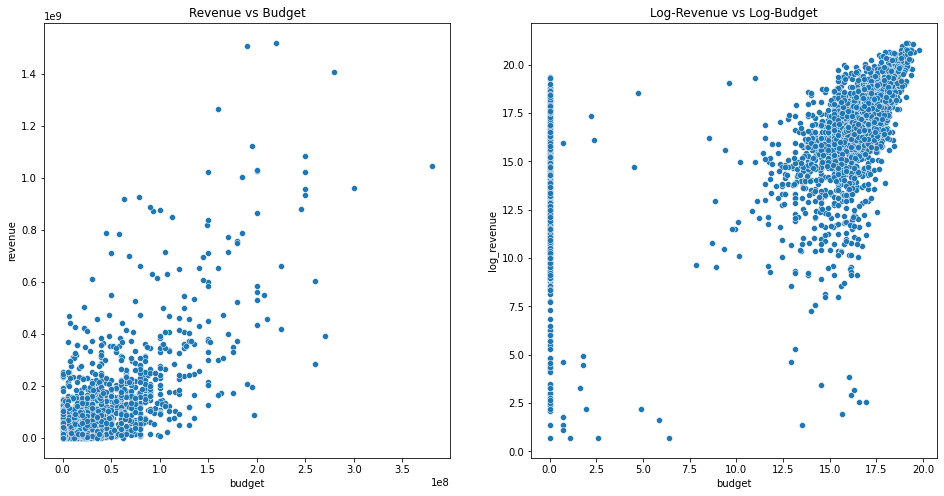

In [23]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.scatterplot(train['budget'],train['revenue'])
plt.title('Revenue vs Budget');
plt.subplot(1,2,2)
sns.scatterplot(np.log1p(train['budget']),train['log_revenue'])
plt.title('Log-Revenue vs Log-Budget');

In [26]:
train['log_budget']=np.log1p(train['budget'])
test['log_budget']=np.log1p(test['budget'])

### Task 4: Does having an Official Homepage Affect Revenue?

In [27]:
train['has_homepage']=0
train.loc[train['homepage'].isnull()==False,'has_homepage']=1
test['has_homepage']=0
test.loc[test['homepage'].isnull()==False,'has_homepage']=1

Text(0.5, 1.0, 'Revenue for movies without homepage vs with homepage')

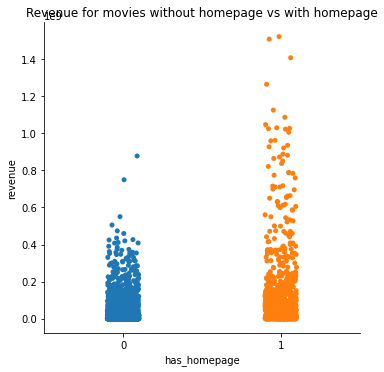

In [28]:
sns.catplot(x='has_homepage',y='revenue',data=train);
plt.title('Revenue for movies without homepage vs with homepage')

### Task 5: Distribution of Languages in Film

In [30]:
language_data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]

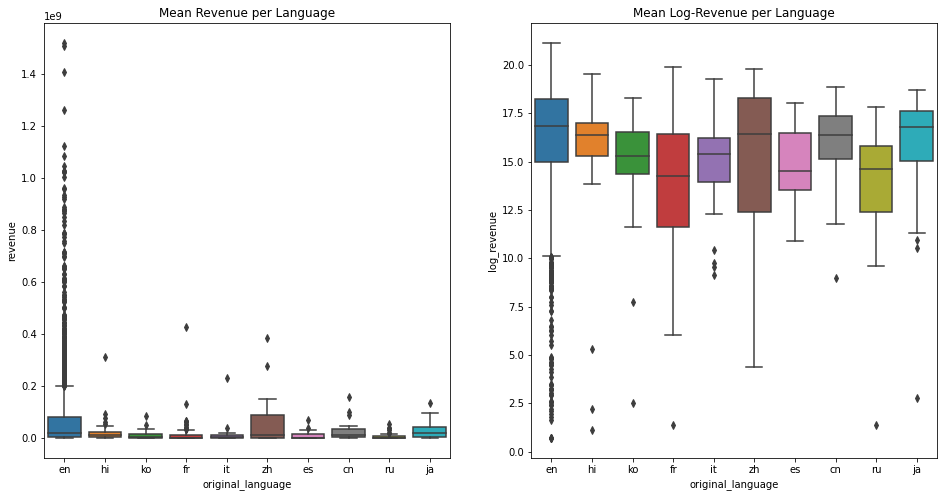

In [33]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(x='original_language',y='revenue',data=language_data)
plt.title('Mean Revenue per Language');
plt.subplot(1,2,2)
sns.boxplot(x='original_language',y='log_revenue',data=language_data)
plt.title('Mean Log-Revenue per Language');


### Task 6: Frequent Words in Film Titles and Descriptions

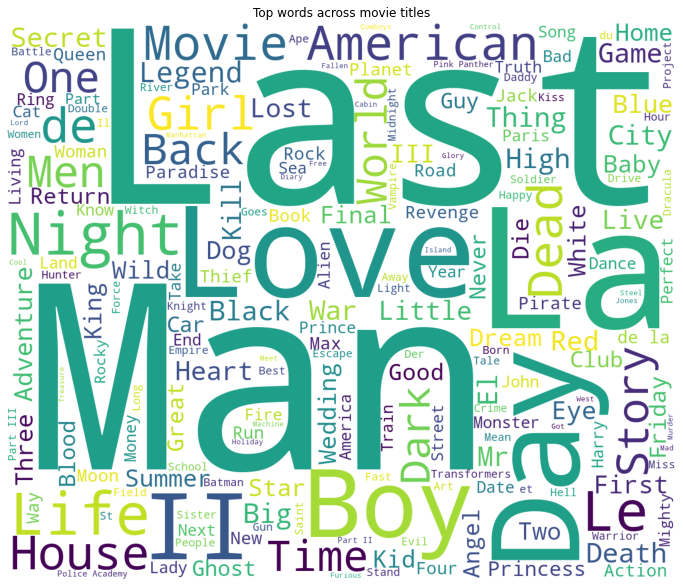

In [39]:
plt.figure(figsize=(12,12))
text=' '.join(train['original_title'].values)
wordcloud=WordCloud(max_font_size=None,background_color='white',width=1200,height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words across movie titles')
plt.axis('off')
plt.show()

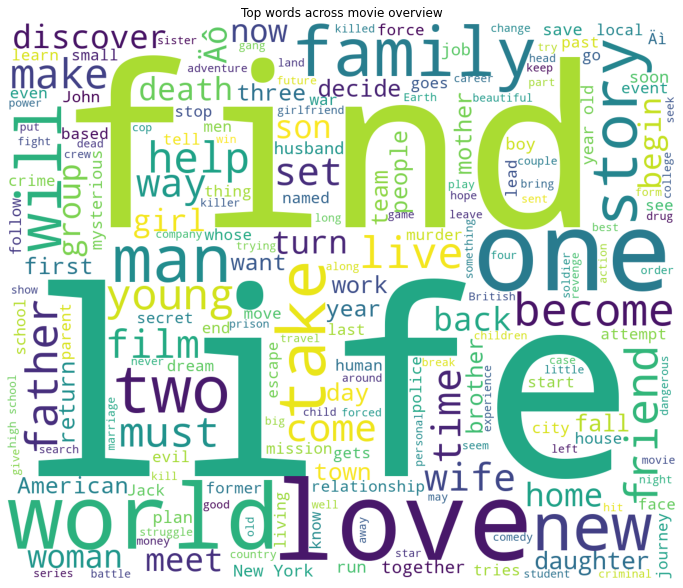

In [40]:
plt.figure(figsize=(12,12))
text=' '.join(train['overview'].fillna('').values)
wordcloud=WordCloud(max_font_size=None,background_color='white',width=1200,height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words across movie overview')
plt.axis('off')
plt.show()

### Task 7: Do Film Descriptions Impact Revenue?

In [45]:
import eli5
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\surab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2),
    min_df=5
)
overview_text=vectorizer.fit_transform(train['overview'].fillna(''))
linreg=LinearRegression()
linreg.fit(overview_text,train['log_revenue'])
eli5.show_weights(linreg,vec=vectorizer,top=20,feature_filter=lambda x:x!='<BIAS>')
